In [1]:
import warnings
warnings.simplefilter("ignore")
import matplotlib.pyplot as plt
import numpy as np
import os

np.seterr(all="ignore")

from threeML import *
from threeML.utils.data_builders import TimeSeriesBuilder
silence_warnings()
%matplotlib inline
set_threeML_style()

11:40:33 WARNING   We have set the min_value of K to 1e-99 because there was a postive transform   ]8;id=469869;file:///home/polpy/astromodels/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=941571;file:///home/polpy/astromodels/astromodels/core/parameter.py#704\704]8;;\

         WARNING   We have set the min_value of K to 1e-99 because there was a postive transform   ]8;id=620364;file:///home/polpy/astromodels/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=782841;file:///home/polpy/astromodels/astromodels/core/parameter.py#704\704]8;;\

         WARNING   We have set the min_value of K to 1e-99 because there was a postive transform   ]8;id=650893;file:///home/polpy/astromodels/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=869293;file:///home/polpy/astromodels/astromodels/core/parameter.py#704\704]8;;\

         WARNING   We have set the min_value of K to 1e-99 because there was a postive transform   ]8;id=278349;file:///home/polpy/astromodels/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=831031;file:///home/polpy/astromodels/astromodels/core/parameter.py#704\704]8;;\

         WARNING   We have set the min_value of F to 1e-99 because there was a postive transform   ]8;id=972422;file:///home/polpy/astromodels/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=304352;file:///home/polpy/astromodels/astromodels/core/parameter.py#704\704]8;;\

         WARNING   We have set the min_value of K to 1e-99 because there was a postive transform   ]8;id=951875;file:///home/polpy/astromodels/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=818112;file:///home/polpy/astromodels/astromodels/core/parameter.py#704\704]8;;\

11:40:33 INFO      Starting 3ML!                                                                     ]8;id=388973;file:///home/polpy/threeML/threeML/__init__.py\__init__.py]8;;\:]8;id=763823;file:///home/polpy/threeML/threeML/__init__.py#35\35]8;;\

         WARNING   WARNINGs here are NOT errors                                                      ]8;id=880826;file:///home/polpy/threeML/threeML/__init__.py\__init__.py]8;;\:]8;id=545393;file:///home/polpy/threeML/threeML/__init__.py#36\36]8;;\

         WARNING   but are inform you about optional packages that can be installed                  ]8;id=776432;file:///home/polpy/threeML/threeML/__init__.py\__init__.py]8;;\:]8;id=935567;file:///home/polpy/threeML/threeML/__init__.py#37\37]8;;\

         WARNING    to disable these messages, turn off start_warning in your config file            ]8;id=734800;file:///home/polpy/threeML/threeML/__init__.py\__init__.py]8;;\:]8;id=538447;file:///home/polpy/threeML/threeML/__init__.py#40\40]8;;\

         WARNING   ROOT minimizer not available                                                ]8;id=61645;file:///home/polpy/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=113266;file:///home/polpy/threeML/threeML/minimizer/minimization.py#1345\1345]8;;\

11:40:34 WARNING   The cthreeML package is not installed. You will not be able to use plugins which  ]8;id=845882;file:///home/polpy/threeML/threeML/__init__.py\__init__.py]8;;\:]8;id=600777;file:///home/polpy/threeML/threeML/__init__.py#94\94]8;;\
                  require the C/C++ interface (currently HAWC)                                                     

         WARNING   Could not import plugin HAWCLike.py. Do you have the relative instrument         ]8;id=82039;file:///home/polpy/threeML/threeML/__init__.py\__init__.py]8;;\:]8;id=963508;file:///home/polpy/threeML/threeML/__init__.py#144\144]8;;\
                  software installed and configured?                                                               

         WARNING   Could not import plugin FermiLATLike.py. Do you have the relative instrument     ]8;id=999930;file:///home/polpy/threeML/threeML/__init__.py\__init__.py]8;;\:]8;id=8822;file:///home/polpy/threeML/threeML/__init__.py#144\144]8;;\
                  software installed and configured?                                                               

11:40:34 WARNING   No fermitools installed                                              ]8;id=349973;file:///home/polpy/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=211385;file:///home/polpy/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#44\44]8;;\

         WARNING   Env. variable OMP_NUM_THREADS is not set. Please set it to 1 for optimal         ]8;id=30949;file:///home/polpy/threeML/threeML/__init__.py\__init__.py]8;;\:]8;id=817854;file:///home/polpy/threeML/threeML/__init__.py#387\387]8;;\
                  performances in 3ML                                                                              

         WARNING   Env. variable MKL_NUM_THREADS is not set. Please set it to 1 for optimal         ]8;id=666807;file:///home/polpy/threeML/threeML/__init__.py\__init__.py]8;;\:]8;id=344388;file:///home/polpy/threeML/threeML/__init__.py#387\387]8;;\
                  performances in 3ML                                                                              

         WARNING   Env. variable NUMEXPR_NUM_THREADS is not set. Please set it to 1 for optimal     ]8;id=597141;file:///home/polpy/threeML/threeML/__init__.py\__init__.py]8;;\:]8;id=610676;file:///home/polpy/threeML/threeML/__init__.py#387\387]8;;\
                  performances in 3ML                                                                              

In [4]:
# reading polarization data from AstroSat CZTI and creating polarization plugin
trigger_time =  219745960.0

czti_polarization_ts = TimeSeriesBuilder.from_polarization(name='czti_pol', polevents='~/co_detected_GRBs/GRB161218B/Fermi_CZTI/cztipol_GRB161218B.pevt',specrsp =None,
                                              polrsp='~/co_detected_GRBs/GRB161218B/Fermi_CZTI/CZTI_POLRSP_EMIN_120_EMAX_1000_GRB161218B.prsp',trigger_time=trigger_time)

czti_polarization_ts.set_background_interval("-350.--150.","150.-350.")
czti_polarization_ts.set_active_time_interval('0-25.0')
czti_data = czti_polarization_ts.to_polarizationlike()

Finding best polynomial Order:   0%|          | 0/5 [00:00<?, ?it/s]

11:43:26 INFO      Auto-determined polynomial order: 0                                            ]8;id=681564;file:///home/polpy/threeML/threeML/utils/time_series/event_list.py\event_list.py]8;;\:]8;id=562645;file:///home/polpy/threeML/threeML/utils/time_series/event_list.py#538\538]8;;\

Fitting CZTI background:   0%|          | 0/8 [00:00<?, ?it/s]

         INFO      None 0-order polynomial fit with the mle method                               ]8;id=396501;file:///home/polpy/threeML/threeML/utils/time_series/time_series.py\time_series.py]8;;\:]8;id=76104;file:///home/polpy/threeML/threeML/utils/time_series/time_series.py#458\458]8;;\

8
8
8
8
8
8


         INFO      Interval set to 0.0-25.0 for czti_pol                                 ]8;id=665020;file:///home/polpy/threeML/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=41152;file:///home/polpy/threeML/threeML/utils/data_builders/time_series_builder.py#290\290]8;;\

~/co_detected_GRBs/GRB161218B/Fermi_CZTI/CZTI_POLRSP_EMIN_120_EMAX_1000_GRB161218B.prsp


In [5]:
#effective area correction
#czti_data.fix_effective_area_correction(2.0)
czti_data.use_effective_area_correction(0.1,300.0)

Using effective area correction


In [6]:
# reading spectrum data from Fermi GBM and creating spectrum plugin
gbm_cat = FermiGBMBurstCatalog()
gbm_cat.query_sources('GRB161218356')
grb_info = gbm_cat.get_detector_information()["GRB161218356"]
gbm_detectors = grb_info["detectors"]
source_interval = grb_info["source"]["fluence"]
background_interval = grb_info["background"]["full"]
best_fit_model = grb_info["best fit model"]["fluence"]

In [7]:
print(source_interval,"\n", background_interval, "\n", gbm_detectors, "\n", type(gbm_detectors))

1.536000-27.393000 
 -19.790000--2.500000,33.960000-53.750000 
 ['n3' 'n4' 'n8' 'b0'] 
 <class 'numpy.ndarray'>


In [9]:
dload = download_GBM_trigger_data("GRB161218356", detectors=gbm_detectors)

11:45:51 INFO      file glg_cspec_n3_bn161218356_v00.pha is already downloaded!           ]8;id=968361;file:///home/polpy/threeML/threeML/io/download_from_http.py\download_from_http.py]8;;\:]8;id=641123;file:///home/polpy/threeML/threeML/io/download_from_http.py#195\195]8;;\

11:45:52 INFO      file glg_cspec_n3_bn161218356_v01.rsp2 is already downloaded!          ]8;id=154654;file:///home/polpy/threeML/threeML/io/download_from_http.py\download_from_http.py]8;;\:]8;id=560239;file:///home/polpy/threeML/threeML/io/download_from_http.py#195\195]8;;\

11:45:53 INFO      file glg_tte_n3_bn161218356_v01.fit is already downloaded!             ]8;id=120462;file:///home/polpy/threeML/threeML/io/download_from_http.py\download_from_http.py]8;;\:]8;id=240905;file:///home/polpy/threeML/threeML/io/download_from_http.py#195\195]8;;\

         INFO      file glg_cspec_n4_bn161218356_v00.pha is already downloaded!           ]8;id=218447;file:///home/polpy/threeML/threeML/io/download_from_http.py\download_from_http.py]8;;\:]8;id=877736;file:///home/polpy/threeML/threeML/io/download_from_http.py#195\195]8;;\

11:45:54 INFO      file glg_cspec_n4_bn161218356_v01.rsp2 is already downloaded!          ]8;id=603724;file:///home/polpy/threeML/threeML/io/download_from_http.py\download_from_http.py]8;;\:]8;id=708972;file:///home/polpy/threeML/threeML/io/download_from_http.py#195\195]8;;\

11:45:55 INFO      file glg_tte_n4_bn161218356_v01.fit is already downloaded!             ]8;id=919199;file:///home/polpy/threeML/threeML/io/download_from_http.py\download_from_http.py]8;;\:]8;id=858130;file:///home/polpy/threeML/threeML/io/download_from_http.py#195\195]8;;\

11:45:56 INFO      file glg_cspec_n8_bn161218356_v00.pha is already downloaded!           ]8;id=675802;file:///home/polpy/threeML/threeML/io/download_from_http.py\download_from_http.py]8;;\:]8;id=711332;file:///home/polpy/threeML/threeML/io/download_from_http.py#195\195]8;;\

11:45:57 INFO      file glg_cspec_n8_bn161218356_v01.rsp2 is already downloaded!          ]8;id=5707;file:///home/polpy/threeML/threeML/io/download_from_http.py\download_from_http.py]8;;\:]8;id=750364;file:///home/polpy/threeML/threeML/io/download_from_http.py#195\195]8;;\

11:45:58 INFO      file glg_tte_n8_bn161218356_v01.fit is already downloaded!             ]8;id=520939;file:///home/polpy/threeML/threeML/io/download_from_http.py\download_from_http.py]8;;\:]8;id=275261;file:///home/polpy/threeML/threeML/io/download_from_http.py#195\195]8;;\

11:45:59 INFO      file glg_cspec_b0_bn161218356_v00.pha is already downloaded!           ]8;id=366917;file:///home/polpy/threeML/threeML/io/download_from_http.py\download_from_http.py]8;;\:]8;id=958606;file:///home/polpy/threeML/threeML/io/download_from_http.py#195\195]8;;\

11:46:00 INFO      file glg_cspec_b0_bn161218356_v01.rsp2 is already downloaded!          ]8;id=828606;file:///home/polpy/threeML/threeML/io/download_from_http.py\download_from_http.py]8;;\:]8;id=134424;file:///home/polpy/threeML/threeML/io/download_from_http.py#195\195]8;;\

11:46:01 INFO      file glg_tte_b0_bn161218356_v01.fit is already downloaded!             ]8;id=57256;file:///home/polpy/threeML/threeML/io/download_from_http.py\download_from_http.py]8;;\:]8;id=296337;file:///home/polpy/threeML/threeML/io/download_from_http.py#195\195]8;;\

Loading PHAII Spectra:   0%|          | 0/2301 [00:00<?, ?it/s]

128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128


Finding best polynomial Order:   0%|          | 0/5 [00:00<?, ?it/s]

11:46:17 INFO      Auto-determined polynomial order: 0                                ]8;id=732762;file:///home/polpy/threeML/threeML/utils/time_series/binned_spectrum_series.py\binned_spectrum_series.py]8;;\:]8;id=677027;file:///home/polpy/threeML/threeML/utils/time_series/binned_spectrum_series.py#389\389]8;;\

Fitting GBM_NAI_03 background:   0%|          | 0/128 [00:00<?, ?it/s]

11:46:21 INFO      None 0-order polynomial fit with the mle method                               ]8;id=550186;file:///home/polpy/threeML/threeML/utils/time_series/time_series.py\time_series.py]8;;\:]8;id=115838;file:///home/polpy/threeML/threeML/utils/time_series/time_series.py#458\458]8;;\

         INFO      Saved fitted background to n3_bkg.h5                                         ]8;id=742774;file:///home/polpy/threeML/threeML/utils/time_series/time_series.py\time_series.py]8;;\:]8;id=238056;file:///home/polpy/threeML/threeML/utils/time_series/time_series.py#1064\1064]8;;\

         INFO      Saved background to n3_bkg.h5                                         ]8;id=909418;file:///home/polpy/threeML/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=905687;file:///home/polpy/threeML/threeML/utils/data_builders/time_series_builder.py#471\471]8;;\

         INFO      Successfully restored fit from n3_bkg.h5                              ]8;id=879318;file:///home/polpy/threeML/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=520015;file:///home/polpy/threeML/threeML/utils/data_builders/time_series_builder.py#171\171]8;;\

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127]
GBM_NAI_03
128
128
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 1

11:46:22 INFO      Interval set to 1.536-27.393 for n3                                   ]8;id=882337;file:///home/polpy/threeML/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=158429;file:///home/polpy/threeML/threeML/utils/data_builders/time_series_builder.py#290\290]8;;\

         INFO      Auto-probed noise models:                                                    ]8;id=7389;file:///home/polpy/threeML/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=249326;file:///home/polpy/threeML/threeML/plugins/SpectrumLike.py#490\490]8;;\

         INFO      - observation: poisson                                                       ]8;id=175333;file:///home/polpy/threeML/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=119641;file:///home/polpy/threeML/threeML/plugins/SpectrumLike.py#491\491]8;;\

         INFO      - background: gaussian                                                       ]8;id=971441;file:///home/polpy/threeML/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=844009;file:///home/polpy/threeML/threeML/plugins/SpectrumLike.py#492\492]8;;\

         INFO      Range 9-900 translates to channels 5-123                                    ]8;id=833436;file:///home/polpy/threeML/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=87131;file:///home/polpy/threeML/threeML/plugins/SpectrumLike.py#1247\1247]8;;\

11:46:23 INFO      Now using 119 bins                                                          ]8;id=793411;file:///home/polpy/threeML/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=110300;file:///home/polpy/threeML/threeML/plugins/SpectrumLike.py#1739\1739]8;;\

Loading PHAII Spectra:   0%|          | 0/2301 [00:00<?, ?it/s]

128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128


Finding best polynomial Order:   0%|          | 0/5 [00:00<?, ?it/s]

11:46:25 INFO      Auto-determined polynomial order: 0                                ]8;id=23635;file:///home/polpy/threeML/threeML/utils/time_series/binned_spectrum_series.py\binned_spectrum_series.py]8;;\:]8;id=625357;file:///home/polpy/threeML/threeML/utils/time_series/binned_spectrum_series.py#389\389]8;;\

Fitting GBM_NAI_04 background:   0%|          | 0/128 [00:00<?, ?it/s]

11:46:28 INFO      None 0-order polynomial fit with the mle method                               ]8;id=535610;file:///home/polpy/threeML/threeML/utils/time_series/time_series.py\time_series.py]8;;\:]8;id=80204;file:///home/polpy/threeML/threeML/utils/time_series/time_series.py#458\458]8;;\

         INFO      Saved fitted background to n4_bkg.h5                                         ]8;id=645044;file:///home/polpy/threeML/threeML/utils/time_series/time_series.py\time_series.py]8;;\:]8;id=306397;file:///home/polpy/threeML/threeML/utils/time_series/time_series.py#1064\1064]8;;\

         INFO      Saved background to n4_bkg.h5                                         ]8;id=757332;file:///home/polpy/threeML/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=626301;file:///home/polpy/threeML/threeML/utils/data_builders/time_series_builder.py#471\471]8;;\

11:46:29 INFO      Successfully restored fit from n4_bkg.h5                              ]8;id=902687;file:///home/polpy/threeML/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=595327;file:///home/polpy/threeML/threeML/utils/data_builders/time_series_builder.py#171\171]8;;\

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127]
GBM_NAI_04
128
128
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 1

         INFO      Interval set to 1.536-27.393 for n4                                   ]8;id=313893;file:///home/polpy/threeML/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=535452;file:///home/polpy/threeML/threeML/utils/data_builders/time_series_builder.py#290\290]8;;\

         INFO      Auto-probed noise models:                                                    ]8;id=619027;file:///home/polpy/threeML/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=482491;file:///home/polpy/threeML/threeML/plugins/SpectrumLike.py#490\490]8;;\

         INFO      - observation: poisson                                                       ]8;id=649362;file:///home/polpy/threeML/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=561683;file:///home/polpy/threeML/threeML/plugins/SpectrumLike.py#491\491]8;;\

         INFO      - background: gaussian                                                       ]8;id=479181;file:///home/polpy/threeML/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=879045;file:///home/polpy/threeML/threeML/plugins/SpectrumLike.py#492\492]8;;\

         INFO      Range 9-900 translates to channels 5-123                                    ]8;id=49301;file:///home/polpy/threeML/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=589319;file:///home/polpy/threeML/threeML/plugins/SpectrumLike.py#1247\1247]8;;\

         INFO      Now using 119 bins                                                          ]8;id=923140;file:///home/polpy/threeML/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=841679;file:///home/polpy/threeML/threeML/plugins/SpectrumLike.py#1739\1739]8;;\

Loading PHAII Spectra:   0%|          | 0/2301 [00:00<?, ?it/s]

128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128


Finding best polynomial Order:   0%|          | 0/5 [00:00<?, ?it/s]

11:46:30 INFO      Auto-determined polynomial order: 0                                ]8;id=514515;file:///home/polpy/threeML/threeML/utils/time_series/binned_spectrum_series.py\binned_spectrum_series.py]8;;\:]8;id=811646;file:///home/polpy/threeML/threeML/utils/time_series/binned_spectrum_series.py#389\389]8;;\

Fitting GBM_NAI_08 background:   0%|          | 0/128 [00:00<?, ?it/s]

11:46:34 INFO      None 0-order polynomial fit with the mle method                               ]8;id=996127;file:///home/polpy/threeML/threeML/utils/time_series/time_series.py\time_series.py]8;;\:]8;id=718691;file:///home/polpy/threeML/threeML/utils/time_series/time_series.py#458\458]8;;\

         INFO      Saved fitted background to n8_bkg.h5                                         ]8;id=520163;file:///home/polpy/threeML/threeML/utils/time_series/time_series.py\time_series.py]8;;\:]8;id=277623;file:///home/polpy/threeML/threeML/utils/time_series/time_series.py#1064\1064]8;;\

         INFO      Saved background to n8_bkg.h5                                         ]8;id=521758;file:///home/polpy/threeML/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=149510;file:///home/polpy/threeML/threeML/utils/data_builders/time_series_builder.py#471\471]8;;\

         INFO      Successfully restored fit from n8_bkg.h5                              ]8;id=320936;file:///home/polpy/threeML/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=559239;file:///home/polpy/threeML/threeML/utils/data_builders/time_series_builder.py#171\171]8;;\

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127]
GBM_NAI_08
128
128
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 1

11:46:35 INFO      Interval set to 1.536-27.393 for n8                                   ]8;id=333823;file:///home/polpy/threeML/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=976102;file:///home/polpy/threeML/threeML/utils/data_builders/time_series_builder.py#290\290]8;;\

         INFO      Auto-probed noise models:                                                    ]8;id=826273;file:///home/polpy/threeML/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=155346;file:///home/polpy/threeML/threeML/plugins/SpectrumLike.py#490\490]8;;\

         INFO      - observation: poisson                                                       ]8;id=388664;file:///home/polpy/threeML/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=942534;file:///home/polpy/threeML/threeML/plugins/SpectrumLike.py#491\491]8;;\

         INFO      - background: gaussian                                                       ]8;id=667693;file:///home/polpy/threeML/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=682085;file:///home/polpy/threeML/threeML/plugins/SpectrumLike.py#492\492]8;;\

         INFO      Range 9-900 translates to channels 4-124                                    ]8;id=333519;file:///home/polpy/threeML/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=356098;file:///home/polpy/threeML/threeML/plugins/SpectrumLike.py#1247\1247]8;;\

         INFO      Now using 121 bins                                                          ]8;id=957167;file:///home/polpy/threeML/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=282123;file:///home/polpy/threeML/threeML/plugins/SpectrumLike.py#1739\1739]8;;\

Loading PHAII Spectra:   0%|          | 0/2301 [00:00<?, ?it/s]

128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128


Finding best polynomial Order:   0%|          | 0/5 [00:00<?, ?it/s]

11:46:36 INFO      Auto-determined polynomial order: 0                                ]8;id=887778;file:///home/polpy/threeML/threeML/utils/time_series/binned_spectrum_series.py\binned_spectrum_series.py]8;;\:]8;id=425474;file:///home/polpy/threeML/threeML/utils/time_series/binned_spectrum_series.py#389\389]8;;\

Fitting GBM_BGO_00 background:   0%|          | 0/128 [00:00<?, ?it/s]

11:46:40 INFO      None 0-order polynomial fit with the mle method                               ]8;id=198918;file:///home/polpy/threeML/threeML/utils/time_series/time_series.py\time_series.py]8;;\:]8;id=279839;file:///home/polpy/threeML/threeML/utils/time_series/time_series.py#458\458]8;;\

         INFO      Saved fitted background to b0_bkg.h5                                         ]8;id=780754;file:///home/polpy/threeML/threeML/utils/time_series/time_series.py\time_series.py]8;;\:]8;id=533393;file:///home/polpy/threeML/threeML/utils/time_series/time_series.py#1064\1064]8;;\

         INFO      Saved background to b0_bkg.h5                                         ]8;id=552977;file:///home/polpy/threeML/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=292816;file:///home/polpy/threeML/threeML/utils/data_builders/time_series_builder.py#471\471]8;;\

         INFO      Successfully restored fit from b0_bkg.h5                              ]8;id=513652;file:///home/polpy/threeML/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=750765;file:///home/polpy/threeML/threeML/utils/data_builders/time_series_builder.py#171\171]8;;\

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127]
GBM_BGO_00
128
128
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 1

         INFO      Interval set to 1.536-27.393 for b0                                   ]8;id=252237;file:///home/polpy/threeML/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=170803;file:///home/polpy/threeML/threeML/utils/data_builders/time_series_builder.py#290\290]8;;\

11:46:41 INFO      Auto-probed noise models:                                                    ]8;id=625443;file:///home/polpy/threeML/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=922994;file:///home/polpy/threeML/threeML/plugins/SpectrumLike.py#490\490]8;;\

         INFO      - observation: poisson                                                       ]8;id=229346;file:///home/polpy/threeML/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=906208;file:///home/polpy/threeML/threeML/plugins/SpectrumLike.py#491\491]8;;\

         INFO      - background: gaussian                                                       ]8;id=573846;file:///home/polpy/threeML/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=65638;file:///home/polpy/threeML/threeML/plugins/SpectrumLike.py#492\492]8;;\

         INFO      Range 250-30000 translates to channels 1-119                                ]8;id=425733;file:///home/polpy/threeML/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=391314;file:///home/polpy/threeML/threeML/plugins/SpectrumLike.py#1247\1247]8;;\

         INFO      Now using 119 bins                                                          ]8;id=931637;file:///home/polpy/threeML/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=443544;file:///home/polpy/threeML/threeML/plugins/SpectrumLike.py#1739\1739]8;;\

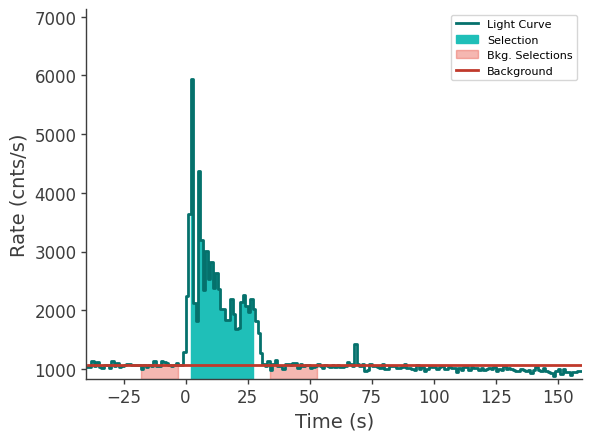

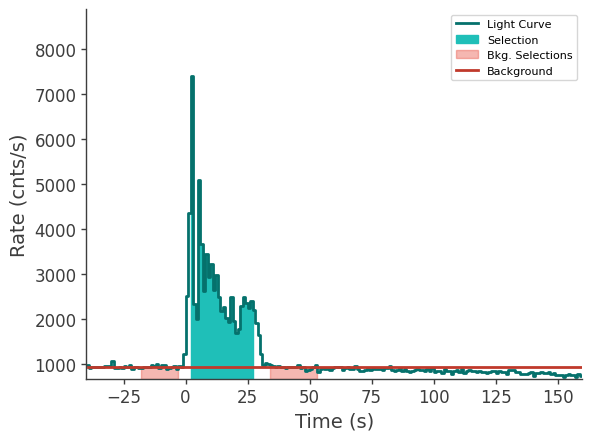

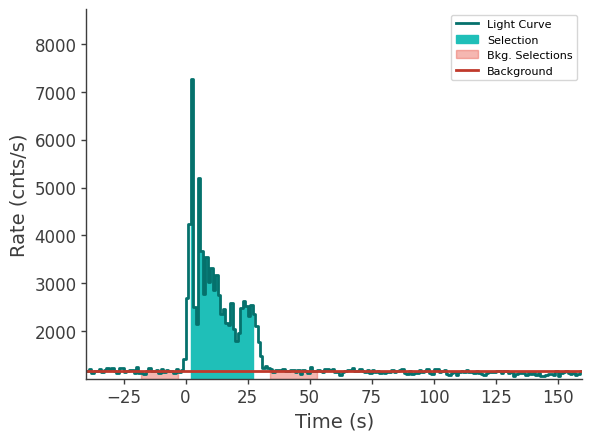

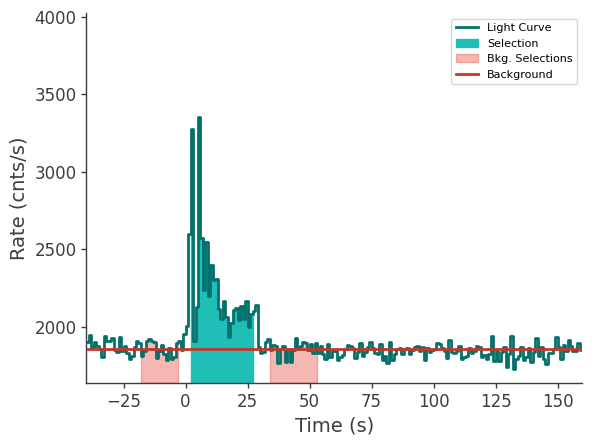

In [10]:
fluence_plugins = []
time_series = {}
#print(best_fit_model, "\n", source_interval, "\n", model.display())
for det in gbm_detectors:

    ts_cspec = TimeSeriesBuilder.from_gbm_cspec_or_ctime(det, cspec_or_ctime_file=dload[det]["cspec"], rsp_file=dload[det]["rsp"])

    ts_cspec.set_background_interval(*background_interval.split(","))
    ts_cspec.save_background(f"{det}_bkg.h5", overwrite=True)

    ts_tte = TimeSeriesBuilder.from_gbm_tte(
        det,
        tte_file=dload[det]["tte"],
        rsp_file=dload[det]["rsp"],
        restore_background=f"{det}_bkg.h5",
    )

    time_series[det] = ts_tte

    ts_tte.set_active_time_interval(source_interval)

    ts_tte.view_lightcurve(-40, 160)

    fluence_plugin = ts_tte.to_spectrumlike()

    if det.startswith("b"):

        fluence_plugin.set_active_measurements("250-30000")

    else:

        fluence_plugin.set_active_measurements("9-900")

    fluence_plugin.rebin_on_background(1.0)

    fluence_plugins.append(fluence_plugin)

In [11]:
#setting up spectrum model
band = Band()

band.xp.prior = Log_normal(mu=np.log(147),sigma=np.log(100))
band.xp.bounds = (None, None)

band.K.bounds = (1E-10, None)
band.K.prior = Log_uniform_prior(lower_bound=1E-5, upper_bound=1E2)

band.alpha.bounds = (-1.5, 1.0)
band.alpha.prior = Truncated_gaussian(mu=-0.29, sigma=0.5, lower_bound=-1.5, upper_bound=1.0)

band.beta.bounds = (None, -1.5)
band.beta.prior = Truncated_gaussian(mu=-2.8,sigma=0.6, lower_bound=-7, upper_bound=-1.5)

#settting up polarization model
lp = LinearPolarization(60,16.91)
lp.angle.set_uninformative_prior(Uniform_prior)
lp.degree.prior = Uniform_prior(lower_bound=0.1, upper_bound=100.0)
lp.degree.value=60.
lp.angle.value=16.91

#adding both component and defining the point source
sc =SpectralComponent('synch', band, lp)
ps = PointSource('GRB161218B',0,0, components = [sc])

combined_model = Model(ps)
datalist = DataList(*fluence_plugins,czti_data)

In [12]:
# Setting up sampler and running bayes

bayes = BayesianAnalysis(combined_model,datalist)
bayes.set_sampler("multinest")
# wrapped = [0] * len(combined_model.free_parameters)
# wrapped[3] = 1
bayes.sampler.setup(n_live_points=400)#,
                        #    resume = False,
                        #    importance_nested_sampling=False,
                        #    verbose=True,
                        #    wrapped_params=wrapped,
                        #    chain_name='chains/synch_p2')
bayes.sample()

         INFO      sampler set to multinest                                                ]8;id=714893;file:///home/polpy/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=832232;file:///home/polpy/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

 *****************************************************
 MultiNest v3.10
 Copyright Farhan Feroz & Mike Hobson
 Release Jul 2015

 no. of live points =  400
 dimensionality =    7
 *****************************************************
 ln(ev)=  -3746.6579406715773      +/-  0.21989321046688592     
  analysing data from chains/fit-.txt
 Total Likelihood Evaluations:        26208
 Sampling finished. Exiting MultiNest


11:49:02 INFO      fit restored to maximum of posterior                                         ]8;id=320429;file:///home/polpy/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=71640;file:///home/polpy/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=697166;file:///home/polpy/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=953563;file:///home/polpy/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
GRB161218B.spectrum.synch.Band.K,(1.267 -0.021 +0.04) x 10^-1,1 / (keV s cm2)
GRB161218B.spectrum.synch.Band.alpha,(-4.25 -0.10 +0.23) x 10^-1,
GRB161218B.spectrum.synch.Band.xp,(2.150 -0.05 +0.026) x 10^2,keV
GRB161218B.spectrum.synch.Band.beta,-2.86 -0.13 +0.09,
GRB161218B.spectrum.synch.polarization.degree,(7.87 -6 -0.12) x 10,
GRB161218B.spectrum.synch.polarization.angle,(1.1 -0.8 +0.4) x 10^2,deg
cons_czti_pol,(4.14 -0.34 +0.35) x 10,


Values of -log(posterior) at the minimum:

,-log(posterior)
b0,-861.194704
czti_pol,-50.620170
n3,-945.334104
n4,-939.956187
n8,-959.629636
total,-3756.734801


Values of statistical measures:

,statistical measures
AIC,7527.707394
BIC,7556.671506
DIC,7472.542533
PDIC,5.091420
log(Z),-1627.152869


In [13]:

bayes.restore_median_fit()

         INFO      fit restored to median of posterior                                          ]8;id=508370;file:///home/polpy/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=240615;file:///home/polpy/threeML/threeML/bayesian/sampler_base.py#164\164]8;;\

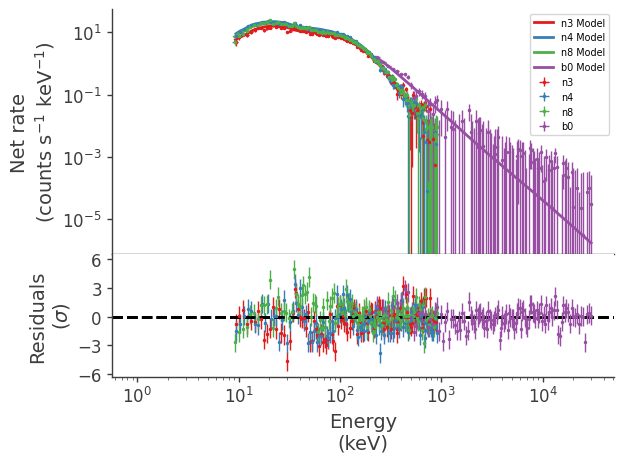

In [14]:
fig = display_spectrum_model_counts(bayes, step=False)

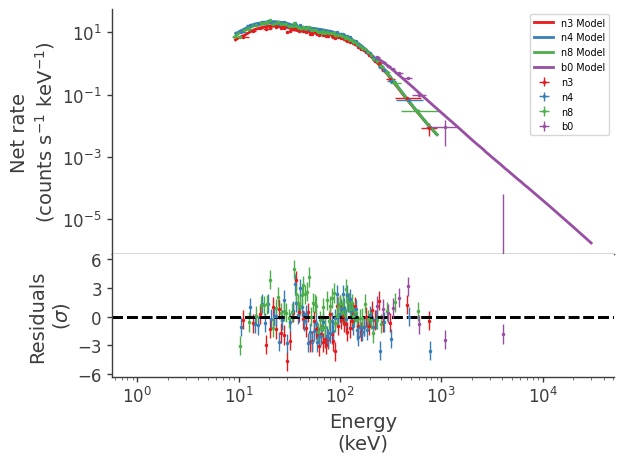

In [15]:
fig = display_spectrum_model_counts(bayes, min_rate=20)

In [16]:
#display everthing in bayes.results
bayes.results.display()

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
GRB161218B.spectrum.synch.Band.K,(1.267 -0.021 +0.04) x 10^-1,1 / (keV s cm2)
GRB161218B.spectrum.synch.Band.alpha,(-4.25 -0.10 +0.23) x 10^-1,
GRB161218B.spectrum.synch.Band.xp,(2.150 -0.05 +0.026) x 10^2,keV
GRB161218B.spectrum.synch.Band.beta,-2.86 -0.13 +0.09,
GRB161218B.spectrum.synch.polarization.degree,(7.87 -6 -0.12) x 10,
GRB161218B.spectrum.synch.polarization.angle,(1.1 -0.8 +0.4) x 10^2,deg
cons_czti_pol,(4.14 -0.34 +0.35) x 10,


Values of -log(posterior) at the minimum:

,-log(posterior)
b0,-861.194704
czti_pol,-50.620170
n3,-945.334104
n4,-939.956187
n8,-959.629636
total,-3756.734801


Values of statistical measures:

,statistical measures
AIC,7527.707394
BIC,7556.671506
DIC,7472.542533
PDIC,5.091420
log(Z),-1627.152869


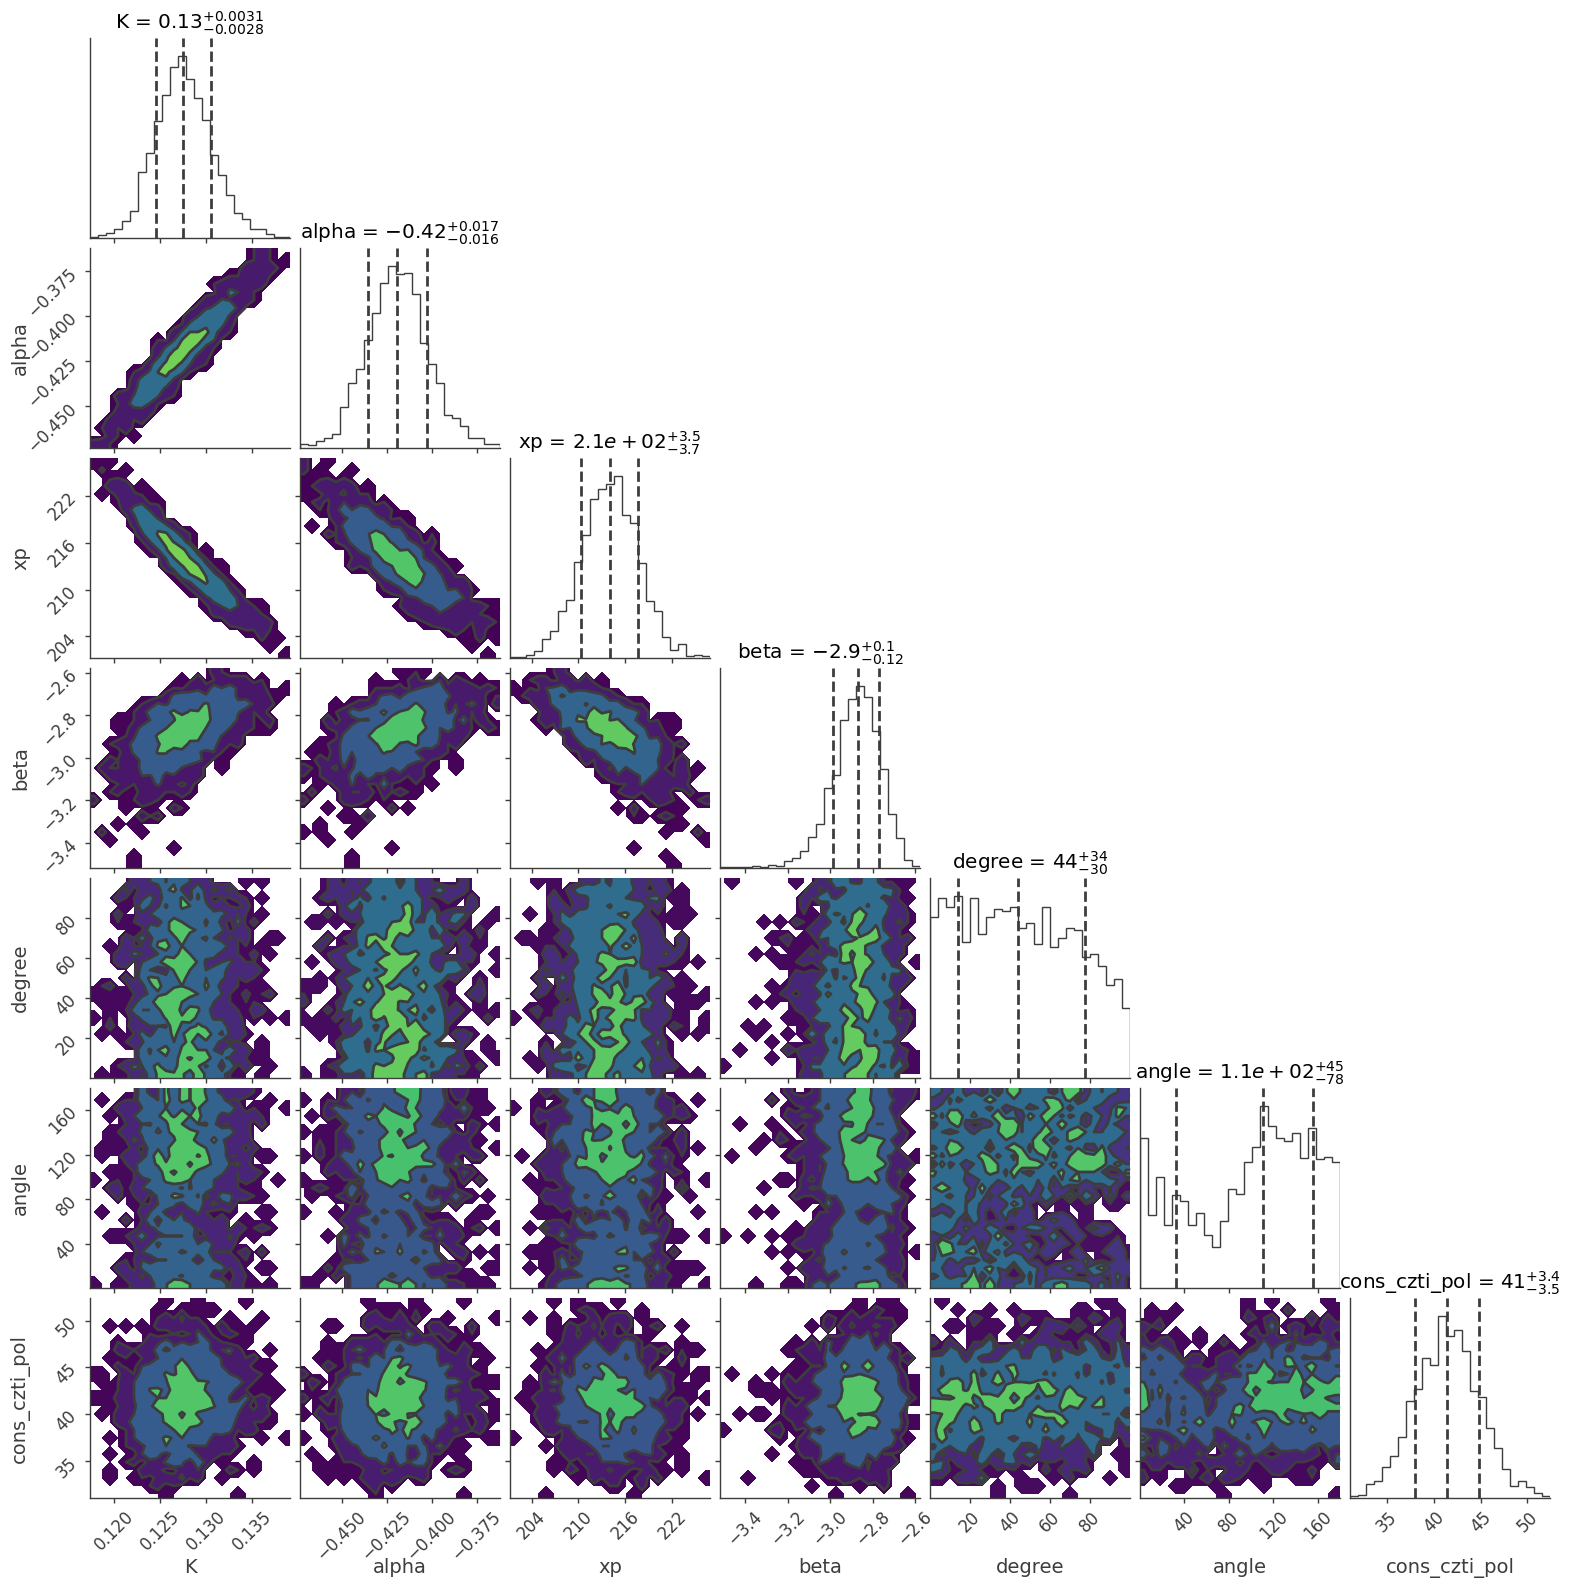

In [17]:
cornerplot = bayes.results.corner_plot()

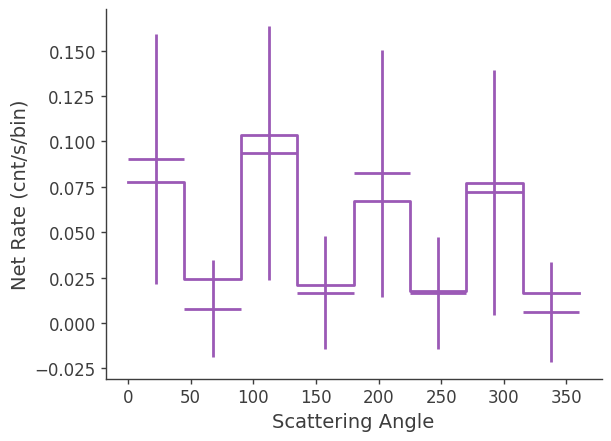

In [18]:
modualtioncurve = czti_data.display(show_model=True)